In [1]:
""""- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized 
    as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

""""

SyntaxError: EOL while scanning string literal (<ipython-input-1-276022c1d18f>, line 14)

In [3]:
#Import Necessary Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.style import use
%matplotlib inline 
import seaborn as sns
from datetime import datetime
import datetime
from matplotlib import style

In [4]:
#load data and call it df_housing'

df =pd.read_csv(r"C:\Users\user\Documents\IT Courses\Machine Learning\Simplilearning\Projects\Data Science with Python\Comcast_telecom_complaints_data.csv")

In [5]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [6]:
# Always check if any value/data is missing first
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [7]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [8]:
# Provide the trend chart for the number of complaints at monthly and daily granularity levels

# create date_time column and merge with Date_month_year
df["date_time"] = df["Date_month_year"] + " " + df["Time"]

# convert both columns to datetime type
df["date_time"] = pd.to_datetime(df["date_time"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

In [9]:
# verify data type
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_time                      datetime64[ns]
dtype: object

In [10]:
# check the dataset  if date_time is added to the column
df = df.set_index(df["date_time"])
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_time
date_time,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56


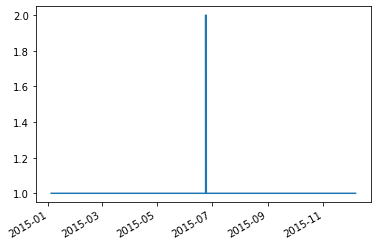

In [11]:
df["date_time"].value_counts().plot()


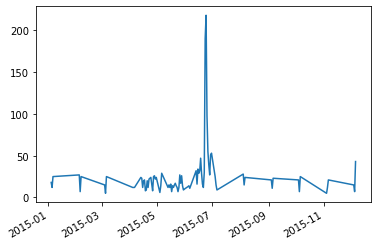

In [12]:
df["Date_month_year"].value_counts().plot()

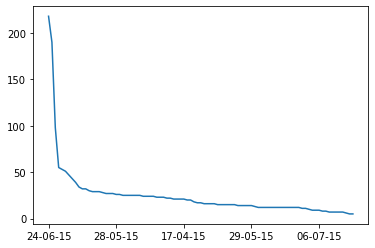

In [13]:
df["Date"].value_counts().plot()

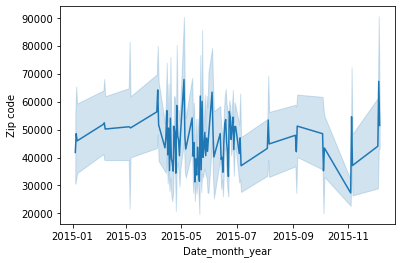

In [14]:
df['Date_month_year']=pd.to_datetime(df['Date_month_year'])
sns.lineplot(x=df['Date_month_year'],y=df['Zip code'])
plt.ylabel('Zip code')
plt.xlabel('Date_month_year')
plt.show()

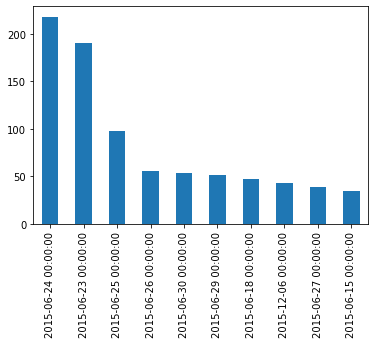

In [15]:
df["Date_month_year"].value_counts().head(10).plot(kind='bar')

In [16]:
#Provide a table with the frequency of complaint types
df.groupby(["Customer Complaint"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0:"Frequency"},axis=1)

,Customer Complaint,Frequency
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
...,...,...
1836,Comcast internet speeds extremely slow,1
1837,Comcast internet speeds,1
1838,Comcast internet service that I was NEVER able...,1
1839,Comcast internet price high,1


In [17]:
f = df.groupby(pd.Grouper(freq="M")).size()
f.head()

date_time
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64

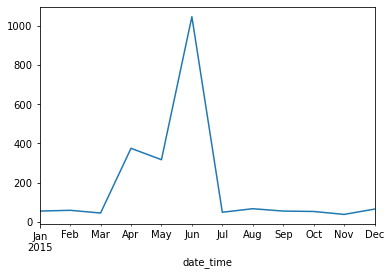

In [18]:
df.groupby(pd.Grouper(freq="M")).size().plot()

In [19]:
df["Customer Complaint"].describe()

count        2224
unique       1841
top       Comcast
freq           83
Name: Customer Complaint, dtype: object

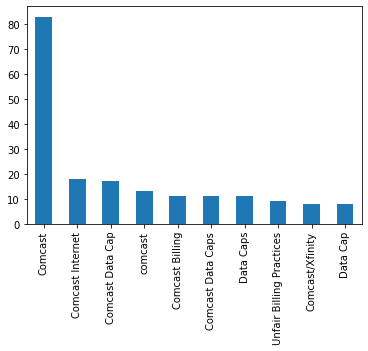

In [20]:
#Which complaint types are maximum
df["Customer Complaint"].value_counts().head(10).plot(kind='bar')

In [21]:
#Create a new categorical variable with value as Open and Closed. Open & Pending 
#is to be categorized as Open and Closed & Solved is to be categorized as Closed.

#check available status first
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [22]:
df["New Status"]=["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]] 

In [23]:
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_time,New Status
date_time,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed


In [24]:
# Which state has the maximum complaints - this shows number of times each state appears
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0:"Count"},axis=1)

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130
6,Michigan,115
7,Washington,98
8,Colorado,80
9,Maryland,78


In [26]:
#all_complaints = df.groupby(["State","New Status"]).size().sort_values(ascending=False).to_frame().rename({0:"Count"},axis=1)
#all_complaints.unstack()

all_complaints = df.groupby(["State","New Status"]).size().unstack().fillna(0)
all_complaints

New Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


In [27]:
all_complaints.isnull().sum()

New Status
Closed    0
Open      0
dtype: int64

In [28]:
#Which state has the highest percentage of unresolved complaints

#create table with Open status only from all_complaints table
unresolved_complaints = all_complaints["Open"].sort_values(ascending=False).to_frame().rename({0:"Count"},axis=1)
unresolved_complaints

,Open
State,
Georgia,80.0
California,61.0
Tennessee,47.0
Florida,39.0
Illinois,29.0
Washington,23.0
Michigan,23.0
Colorado,22.0
Texas,22.0


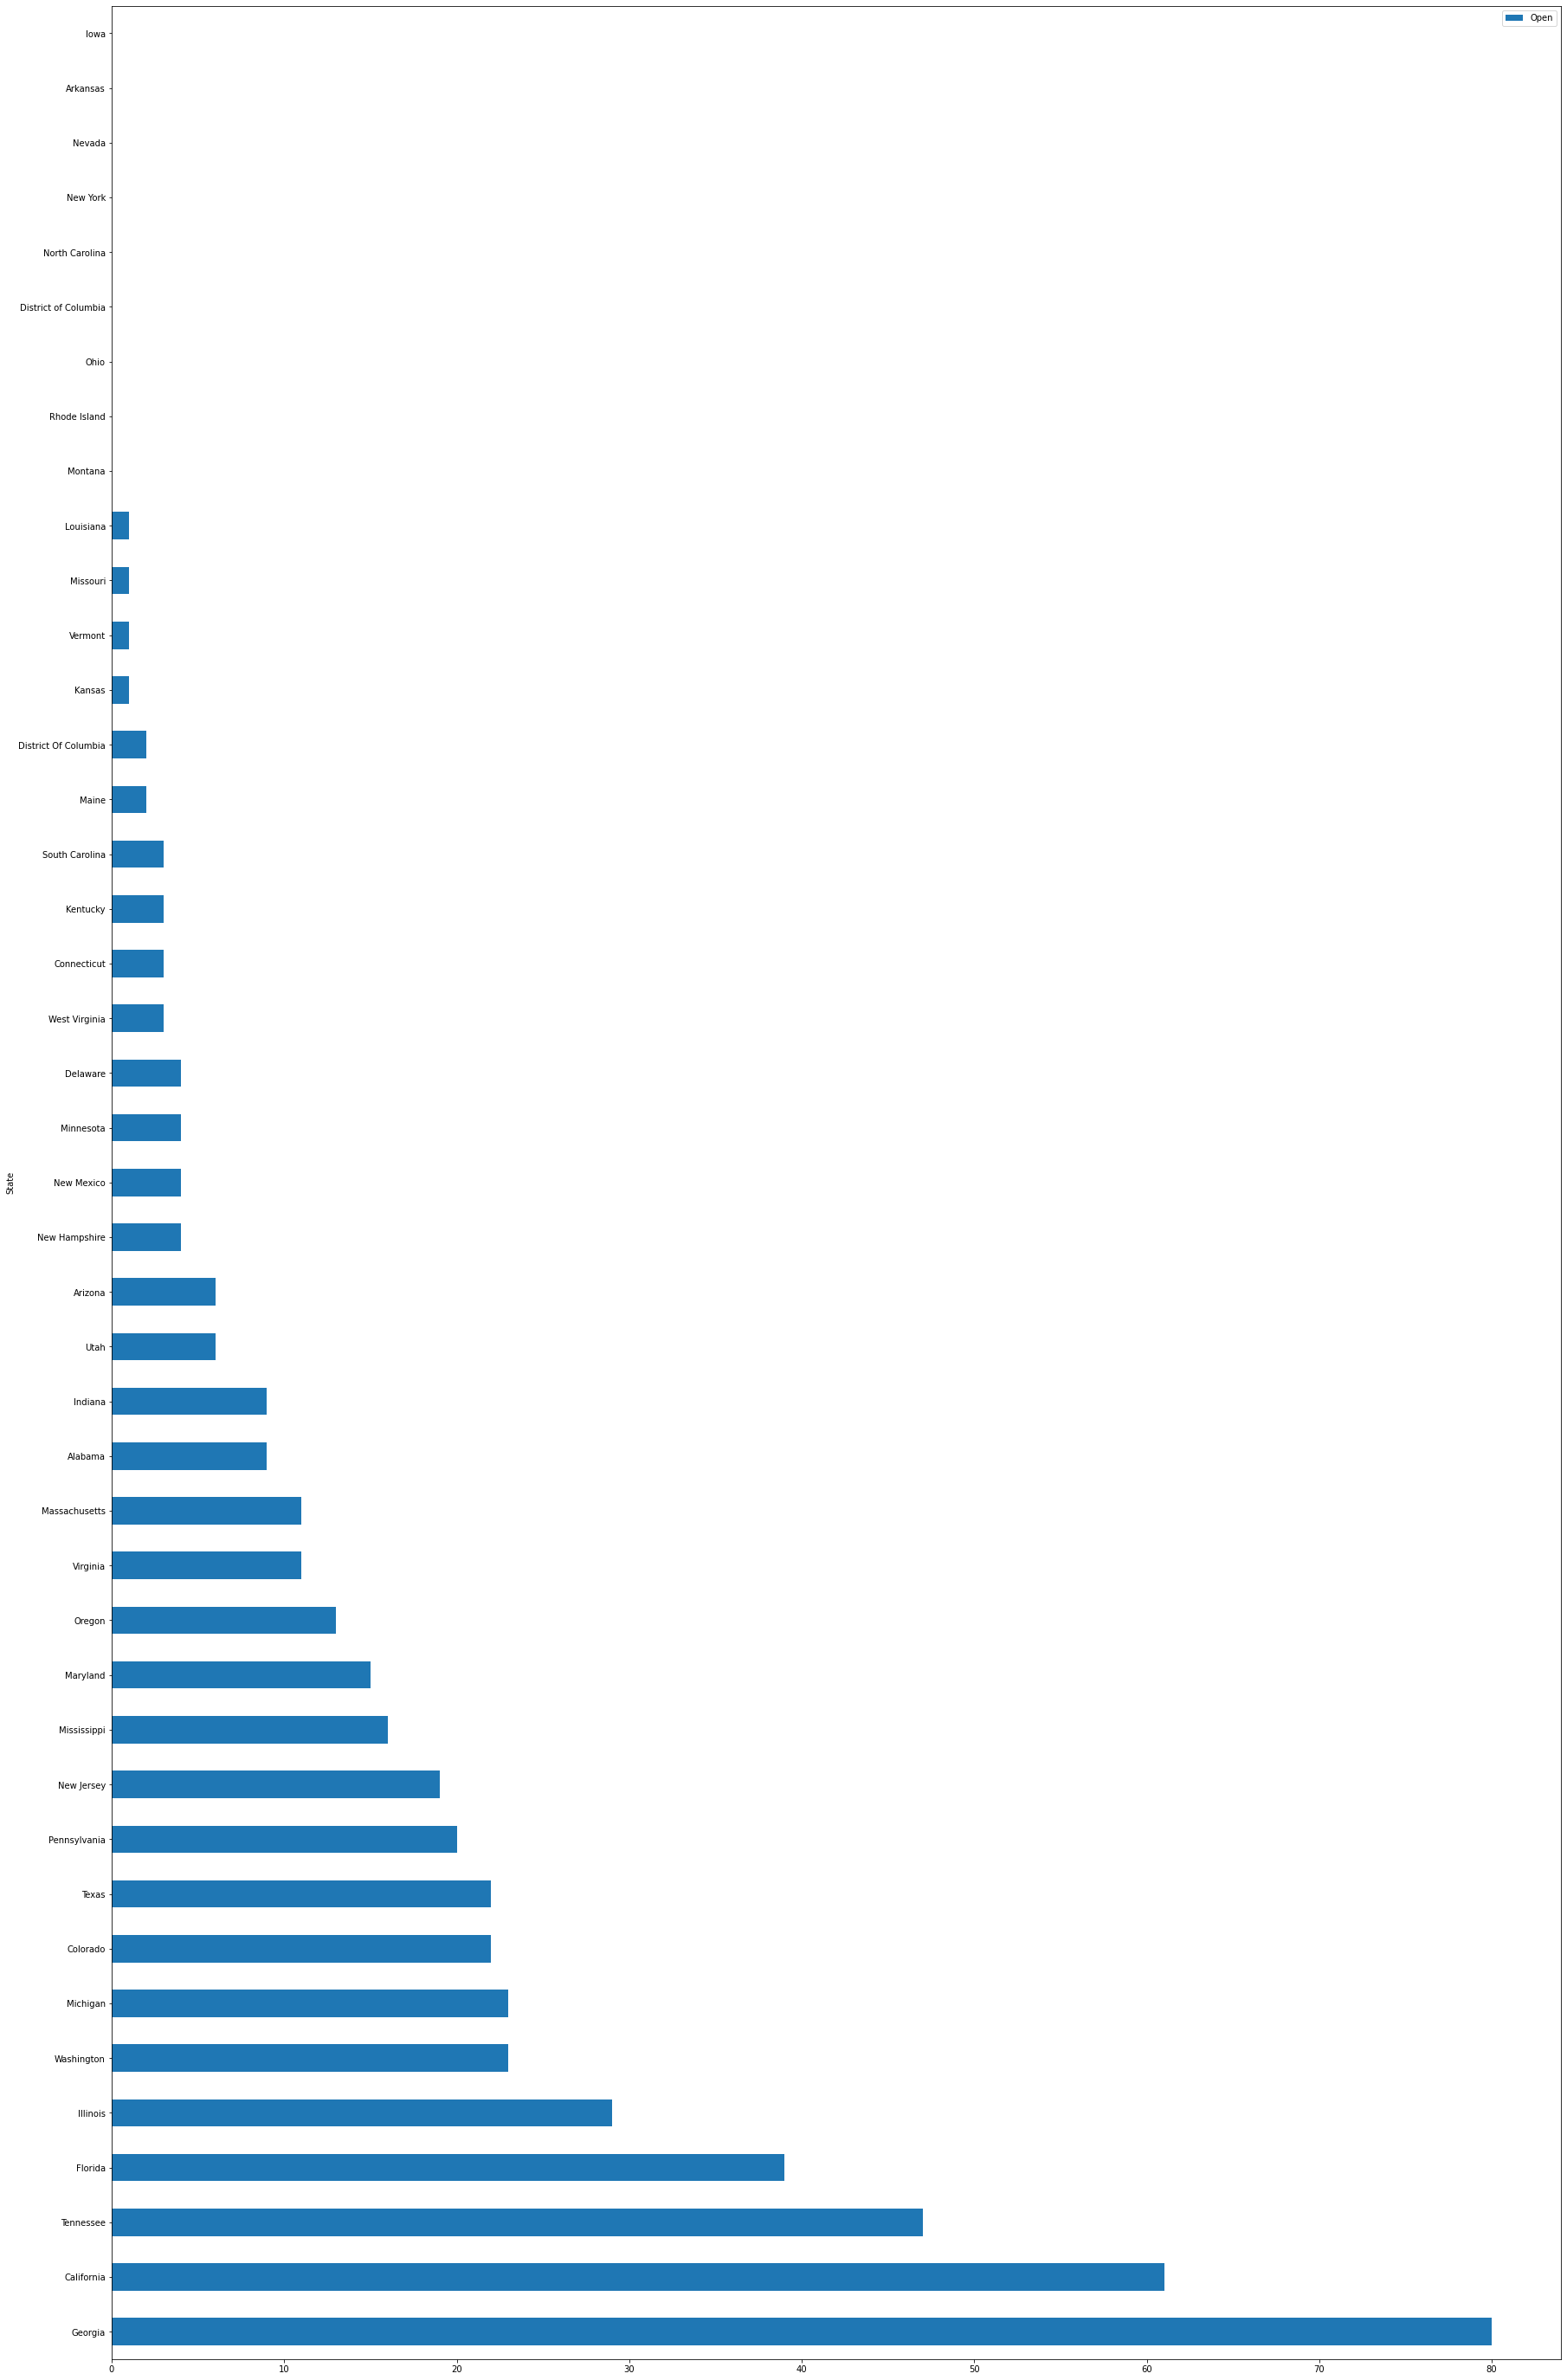

In [29]:
#state that has highest percentage of unresolved complaints in pie chart form
unresolved_complaints.plot(kind="barh", figsize=(30,50), stacked=True)

In [30]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_time,New Status
date_time,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed


In [31]:
# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls
grouping = pd.DataFrame({'count':df.groupby(['Customer Complaint','Received Via',"New Status"]).size()}).reset_index()
grouping.groupby("New Status").get_group("Closed")

,Customer Complaint,Received Via,New Status,count
0,(Comcast is not my complaint!) Cyber Tele-mark...,Customer Care Call,Closed,1
2,2 months and Comcast has not fixed problem,Internet,Closed,1
3,2+ Day Degraded Services,Internet,Closed,1
4,300 GB monthly allowance,Customer Care Call,Closed,1
7,300GB/month data cap 'trial' for several years...,Customer Care Call,Closed,1
...,...,...,...,...
1962,very poor customer service,Customer Care Call,Closed,1
1963,why am I paying for this ?,Customer Care Call,Closed,1
1965,xfinitty tv and exfinity alarm,Internet,Closed,1
1966,xfinity Internet,Internet,Closed,1


In [32]:
df.groupby(["State","New Status"]).size().unstack().fillna(0)

New Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


In [33]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

In [34]:
df.groupby(["State","New Status"]).size().unstack().fillna(0).max()

New Status
Closed    208.0
Open       80.0
dtype: float64

In [35]:
df.groupby(["State"]).size().fillna(0).max()

288